## 1. Build regression model on the employee attrition dataset

### Apply differents models on the 1st dataframe (with 19 variables)
1. Logfit 
2. Logistic Regression 
3. Apply Multicollinearity on both models
4. Oversampling : to have the same proportion of Yes/No (45% / 55%)


cf. Google Slides Presentation with all the scores of differents models 

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('EmployeeAttritionv2.csv')

In [4]:
df.Cat_Age=df.Cat_Age.map({'41-50':3, '31-40':2, '18-30':1, '51-60':4})

In [5]:
df.head()

,Unnamed: 0,Gender,Age,Cat_Age,Attrition,Attrition_bol,Department,JobRole,JobInvolvement,JobLevel,...,RelationshipSatisfaction,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,Female,41,3,Yes,1,Sales,Sales Executive,3,2,...,1,8,0,8,0,1,6,4,0,5
1,1,Male,49,3,No,0,Research & Development,Research Scientist,2,2,...,4,1,1,10,3,3,10,7,1,7
2,2,Male,37,2,Yes,1,Research & Development,Laboratory Technician,2,1,...,2,6,0,7,3,3,0,0,0,0
3,3,Female,33,2,No,0,Research & Development,Research Scientist,3,1,...,3,1,0,8,3,3,8,7,3,0
4,4,Male,27,1,No,0,Research & Development,Laboratory Technician,3,1,...,4,9,1,6,3,3,2,2,2,2


In [6]:
y=df.Attrition_bol
X=df.drop(['Attrition_bol','Unnamed: 0','DistanceFromHome','Age'],axis=1)._get_numeric_data()

In [178]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Cat_Age,1470.0,2.151020,0.921151,1.0,1.0,2.0,3.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
Distance_Home,1470.0,1.827891,1.039537,1.0,1.0,1.0,2.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0


In [179]:
X.shape

(1470, 20)

In [180]:
import numpy as np
X.MonthlyIncome=np.log(X.MonthlyIncome)

In [181]:
import statsmodels.api as sm

In [182]:
X.drop(['Education','PerformanceRating','PercentSalaryHike','Cat_Age'],axis=1,inplace=True)

In [183]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
JobInvolvement,1470.0,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.0,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000
JobSatisfaction,1470.0,2.728571,1.102846,1.000000,2.000000,3.000000,4.000000,4.000000
Distance_Home,1470.0,1.827891,1.039537,1.000000,1.000000,1.000000,2.000000,4.000000
MonthlyIncome,1470.0,8.552515,0.664450,6.916715,7.976252,8.500858,9.033484,9.903438
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.000000,2.000000,3.000000,4.000000,4.000000
NumCompaniesWorked,1470.0,2.693197,2.498009,0.000000,1.000000,2.000000,4.000000,9.000000
StockOptionLevel,1470.0,0.793878,0.852077,0.000000,0.000000,1.000000,1.000000,3.000000
TotalWorkingYears,1470.0,11.279592,7.780782,0.000000,6.000000,10.000000,15.000000,40.000000


In [184]:
from statsmodels.tools.tools import add_constant
X=add_constant(X)

### Model 1 - Logfit

In [743]:
#from statsmodels.tools.tools import add_constant
#X=add_constant(X)
model_1=sm.Logit(y,X)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [744]:
X.shape

(1470, 17)

In [745]:
res_1=model_1.fit()
res_1.summary()

Optimization terminated successfully.
         Current function value: 0.363441
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_bol   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                           16
Date:                Fri, 22 Nov 2019   Pseudo R-squ.:                  0.1772
Time:                        11:24:20   Log-Likelihood:                -534.26
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.199e-40
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.4090      2.340      4.876      0.000       6.823      15.995
JobInvolvement              -0.5093      0.109     -4.694      0.000      -0.722      -0.297
JobLevel                     0.2824      0.213      1.326      0.185      -0.135       0.700
JobSatisfaction             -0.3088      0.071     -4.345      0.000      -0.448      -0.170
Distance_Home                0.2503      0.072      3.462      0.001       0.109       0.392
MonthlyIncome               -1.0434      0.303     -3.448      0.001      -1.636      -0.450
EnvironmentSatisfaction     -0.3120      0.071     -4.384      0.000      -0.451      -0.172
RelationshipSatisfaction    -0.1792      0.072     -2.484      0.013      -0.321      -0.038
NumCompaniesWorked           0.1381      0.033      4.168      0.000       0.073       0.203
StockOptionLevel            -0.5362      0.104     -5.135      0.000      -0.741      -0.332
TotalWorkingYears           -0.0710      0.023     -3.144      0.002      -0.115      -0.027
TrainingTimesLastYear       -0.1702      0.063     -2.704      0.007      -0.294      -0.047
WorkLifeBalance             -0.2281      0.107     -2.137      0.033      -0.437      -0.019
YearsAtCompany               0.0640      0.034      1.874      0.061      -0.003       0.131
YearsInCurrentRole          -0.1041      0.041     -2.566      0.010      -0.184      -0.025
YearsSinceLastPromotion      0.1424      0.037      3.874      0.000       0.070       0.214
YearsWithCurrManager        -0.1055      0.041     -2.601      0.009      -0.185      -0.026
============================================================================================
"""

In [746]:
from sklearn.metrics import confusion_matrix

In [747]:
X.shape

(1470, 17)

In [748]:
pred_1=round(res_1.predict(X))
confusion_matrix(y,pred_1)

array([[1212,   21],
       [ 189,   48]], dtype=int64)

#### Score_model_1 Logfit

In [749]:
m.recall_score(y,pred_1)

0.20253164556962025

In [468]:
y.value_counts()

0    1233
1     237
Name: Attrition_bol, dtype: int64

### Model 2 - Logistic Regression 

In [750]:
from sklearn.linear_model import LogisticRegression

In [751]:
? LogisticRegression

In [752]:
model_2=LogisticRegression(class_weight='balanced').fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [753]:
pred_2=model_2.predict(X)

In [754]:
confusion_matrix(y,pred_2)

array([[836, 397],
       [ 70, 167]], dtype=int64)

#### Score Modele_2 LogisticRegression

In [756]:
m.recall_score(y,pred_2)

0.7046413502109705

In [757]:
model_2.coef_ 

array([[ 2.3882586 , -0.42227147, -0.25547676, -0.24908216,  0.2531403 ,
        -0.06862075, -0.26691397, -0.13233689,  0.12312928, -0.43806569,
        -0.06620568, -0.14879252, -0.12334816,  0.08617347, -0.12314878,
         0.14034325, -0.11811728]])

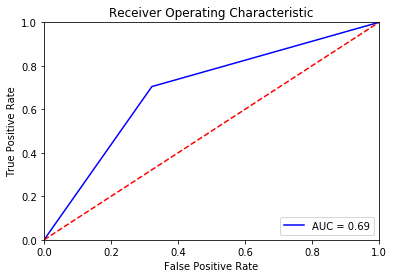

In [758]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_2.predict(X)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multicollinearity (Model1 & Model2)

In [759]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [760]:
X.drop(['const','MonthlyIncome','JobInvolvement','WorkLifeBalance','YearsAtCompany'],axis=1,inplace=True)

In [761]:
X.drop(['JobLevel'],axis=1,inplace=True)
pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)

JobSatisfaction             5.671683
Distance_Home               3.673113
EnvironmentSatisfaction     5.800342
RelationshipSatisfaction    6.008467
NumCompaniesWorked          2.413350
StockOptionLevel            1.847114
TotalWorkingYears           4.732680
TrainingTimesLastYear       4.756000
YearsInCurrentRole          5.508090
YearsSinceLastPromotion     2.244474
YearsWithCurrManager        5.186840
dtype: float64

In [762]:
X.shape

(1470, 11)

### Model 1m - Multicollinearity

In [763]:
X=add_constant(X)
model_1m=sm.Logit(y,X)

res_1m=model_1m.fit()
res_1m.summary()

Optimization terminated successfully.
         Current function value: 0.380048
         Iterations 7


C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_bol   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1458
Method:                           MLE   Df Model:                           11
Date:                Fri, 22 Nov 2019   Pseudo R-squ.:                  0.1396
Time:                        11:27:57   Log-Likelihood:                -558.67
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.679e-33
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4898      0.426      3.498      0.000       0.655       2.325
JobSatisfaction             -0.2890      0.069     -4.196      0.000      -0.424      -0.154
Distance_Home                0.2473      0.071      3.503      0.000       0.109       0.386
EnvironmentSatisfaction     -0.2929      0.069     -4.228      0.000      -0.429      -0.157
RelationshipSatisfaction    -0.1756      0.070     -2.510      0.012      -0.313      -0.038
NumCompaniesWorked           0.1033      0.031      3.303      0.001       0.042       0.165
StockOptionLevel            -0.5487      0.104     -5.297      0.000      -0.752      -0.346
TotalWorkingYears           -0.0858      0.016     -5.374      0.000      -0.117      -0.055
TrainingTimesLastYear       -0.1526      0.060     -2.537      0.011      -0.271      -0.035
YearsInCurrentRole          -0.1007      0.038     -2.651      0.008      -0.175      -0.026
YearsSinceLastPromotion      0.1730      0.035      4.986      0.000       0.105       0.241
YearsWithCurrManager        -0.0782      0.037     -2.093      0.036      -0.151      -0.005
============================================================================================
"""

In [764]:
pred_1m=round(res_1m.predict(X))
confusion_matrix(y,pred_1m)

array([[1225,    8],
       [ 212,   25]], dtype=int64)

#### Score Model_1m Logit & Multicollinearity

In [765]:
m.recall_score(y,pred_11)

0.10548523206751055

In [766]:
m.precision_score(y,pred_11)

0.7575757575757576

In [767]:
m.f1_score(y,pred_11)

0.1851851851851852

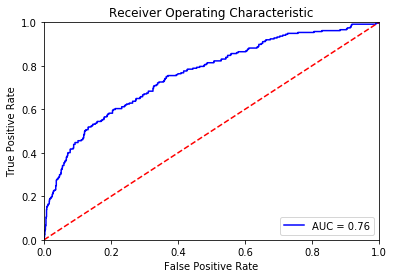

In [768]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = res_11.predict(X)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Modele 2 - LogisticRegression & Multicollinearity

In [771]:
model_2m=LogisticRegression(class_weight='balanced').fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [772]:
pred_2m=model_2m.predict(X)

#### Score Modele 2m 

In [776]:
confusion_matrix(y,pred_2m)

array([[811, 422],
       [ 68, 169]], dtype=int64)

In [777]:
m.recall_score(y,pred_2m)

0.7130801687763713

In [778]:
m.precision_score(y,pred_2m)

0.2859560067681895

In [779]:
m.f1_score(y,pred_22)

0.41697877652933835

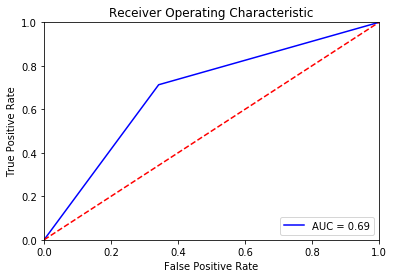

In [780]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_22.predict(X)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Modele Logistic Regression - with different parameters

In [782]:
model_22=LogisticRegression(class_weight='balanced',verbose=50,solver='liblinear').fit(X,y)

[LibLinear]

In [783]:
pred_22=model_22.predict(X)

In [784]:
confusion_matrix(y,pred_22)

array([[811, 422],
       [ 68, 169]], dtype=int64)

In [785]:
m.recall_score(y,pred_22)

0.7130801687763713

# Resampling
Modele 3 & 4

In [154]:
dfyes=df.loc[df.Attrition=='Yes']

In [159]:
df_sample=dfyes.sample(n=800,random_state=1,replace=True)

In [160]:
df_new=df.append(df_sample)

In [7]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [162]:
df_new.Attrition.value_counts()

No     1233
Yes    1037
Name: Attrition, dtype: int64

In [163]:
y_new=df_new.Attrition_bol
X_new=df_new.drop(['Attrition_bol','Unnamed: 0','DistanceFromHome','Age'],axis=1)._get_numeric_data()

In [164]:
X_new.MonthlyIncome=np.log(X_new.MonthlyIncome)

In [165]:
X_new.shape

(2270, 20)

### Modele_3 Logfit

In [166]:
# X.drop(['Education','PerformanceRating','PercentSalaryHike','Cat_Age','JobLevel'],axis=1,inplace=True)
#drop[,]
X_new.drop(['Education','PerformanceRating','PercentSalaryHike','Cat_Age'],axis=1,inplace=True)

In [167]:
X_new=add_constant(X_new)
model_3=sm.Logit(y_new,X_new)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [168]:
res_3=model_3.fit()
res_3.summary()

Optimization terminated successfully.
         Current function value: 0.565437
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_bol   No. Observations:                 2270
Model:                          Logit   Df Residuals:                     2253
Method:                           MLE   Df Model:                           16
Date:                Fri, 22 Nov 2019   Pseudo R-squ.:                  0.1798
Time:                        15:37:46   Log-Likelihood:                -1283.5
converged:                       True   LL-Null:                       -1565.0
Covariance Type:            nonrobust   LLR p-value:                1.702e-109
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.2788      1.439      8.533      0.000       9.458      15.099
JobInvolvement              -0.4542      0.068     -6.708      0.000      -0.587      -0.322
JobLevel                     0.3928      0.125      3.138      0.002       0.147       0.638
JobSatisfaction             -0.2497      0.044     -5.709      0.000      -0.335      -0.164
Distance_Home                0.2816      0.045      6.237      0.000       0.193       0.370
MonthlyIncome               -1.0484      0.186     -5.627      0.000      -1.414      -0.683
EnvironmentSatisfaction     -0.3197      0.044     -7.350      0.000      -0.405      -0.234
RelationshipSatisfaction    -0.1607      0.044     -3.639      0.000      -0.247      -0.074
NumCompaniesWorked           0.1231      0.021      5.824      0.000       0.082       0.164
StockOptionLevel            -0.4261      0.058     -7.354      0.000      -0.540      -0.313
TotalWorkingYears           -0.0818      0.013     -6.141      0.000      -0.108      -0.056
TrainingTimesLastYear       -0.1656      0.038     -4.352      0.000      -0.240      -0.091
WorkLifeBalance             -0.2238      0.066     -3.400      0.001      -0.353      -0.095
YearsAtCompany               0.0688      0.019      3.586      0.000       0.031       0.106
YearsInCurrentRole          -0.0915      0.025     -3.683      0.000      -0.140      -0.043
YearsSinceLastPromotion      0.1348      0.021      6.542      0.000       0.094       0.175
YearsWithCurrManager        -0.0876      0.024     -3.690      0.000      -0.134      -0.041
============================================================================================
"""

In [215]:
X_new.columns

Index(['const', 'JobSatisfaction', 'Distance_Home', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [216]:
X.columns

Index(['const', 'JobSatisfaction', 'Distance_Home', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [186]:
from sklearn.metrics import confusion_matrix
pred_3=round(res_3.predict(X))
confusion_matrix(y,pred_3)

array([[912, 321],
       [ 84, 153]], dtype=int64)

In [217]:
X.shape

(1470, 12)

In [218]:
X_new.shape

(2270, 12)

#### Score _ Modele 3 Logfit resamp

In [189]:
import sklearn.metrics as m
m.recall_score(y,pred_3)

0.6455696202531646

### Model_4 Logistic Regression 

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
model_4=LogisticRegression(class_weight='balanced').fit(X_new,y_new)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [194]:
pred_4=model_4.predict(X)

In [195]:
confusion_matrix(y,pred_4)

array([[847, 386],
       [ 70, 167]], dtype=int64)

In [196]:
m.recall_score(y,pred_4)

0.7046413502109705

### Multicollinearity - model 3

In [197]:
X_new.drop(['const','MonthlyIncome','JobInvolvement','WorkLifeBalance','YearsAtCompany','JobLevel'],axis=1,inplace=True)

In [198]:
#X_new.drop(['const'],axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
pd.Series([VIF(X_new.values,i) for i in range(X_new.shape[1])],index=X_new.columns)

JobSatisfaction             5.533790
Distance_Home               3.620971
EnvironmentSatisfaction     5.293168
RelationshipSatisfaction    5.981403
NumCompaniesWorked          2.378096
StockOptionLevel            1.685864
TotalWorkingYears           4.647455
TrainingTimesLastYear       4.580614
YearsInCurrentRole          5.676752
YearsSinceLastPromotion     2.399534
YearsWithCurrManager        5.350607
dtype: float64

In [199]:
X_new.columns

Index(['JobSatisfaction', 'Distance_Home', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'NumCompaniesWorked', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [200]:
X_new=add_constant(X_new)
model_3m=sm.Logit(y_new,X_new)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [201]:
res_3m=model_3m.fit()
res_3m.summary()

Optimization terminated successfully.
         Current function value: 0.591871
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_bol   No. Observations:                 2270
Model:                          Logit   Df Residuals:                     2258
Method:                           MLE   Df Model:                           11
Date:                Fri, 22 Nov 2019   Pseudo R-squ.:                  0.1415
Time:                        15:40:50   Log-Likelihood:                -1343.5
converged:                       True   LL-Null:                       -1565.0
Covariance Type:            nonrobust   LLR p-value:                 4.782e-88
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.4285      0.265      9.160      0.000       1.909       2.948
JobSatisfaction             -0.2143      0.042     -5.083      0.000      -0.297      -0.132
Distance_Home                0.2666      0.044      6.113      0.000       0.181       0.352
EnvironmentSatisfaction     -0.2908      0.042     -6.923      0.000      -0.373      -0.208
RelationshipSatisfaction    -0.1415      0.043     -3.307      0.001      -0.225      -0.058
NumCompaniesWorked           0.0932      0.020      4.664      0.000       0.054       0.132
StockOptionLevel            -0.4489      0.057     -7.917      0.000      -0.560      -0.338
TotalWorkingYears           -0.0828      0.009     -9.076      0.000      -0.101      -0.065
TrainingTimesLastYear       -0.1444      0.037     -3.926      0.000      -0.217      -0.072
YearsInCurrentRole          -0.0766      0.022     -3.419      0.001      -0.121      -0.033
YearsSinceLastPromotion      0.1592      0.020      8.043      0.000       0.120       0.198
YearsWithCurrManager        -0.0582      0.022     -2.657      0.008      -0.101      -0.015
============================================================================================
"""

In [202]:
X.drop(['JobLevel','MonthlyIncome','JobInvolvement','WorkLifeBalance','YearsAtCompany'],axis=1,inplace=True)

In [203]:
pred_3m=round(res_3m.predict(X))
confusion_matrix(y,pred_3m)

array([[890, 343],
       [ 81, 156]], dtype=int64)

In [204]:
tn, fp, fn, tp = confusion_matrix(y,pred_3m).ravel()
print(tn, fp, fn, tp)

890 343 81 156


In [205]:
X_new.shape

(2270, 12)

In [206]:
X.shape

(1470, 12)

### Score Model 3m - resamp & multicollinearity

In [207]:
m.recall_score(y,pred_3m)

0.6582278481012658

In [208]:
m.precision_score(y,pred_3m)

0.312625250501002

In [209]:
m.f1_score(y,pred_3m)

0.42391304347826086

### Modele Logistic Regression 4 -  multicollinearity

In [210]:
model_4m=LogisticRegression(class_weight='balanced').fit(X_new,y_new)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [211]:
pred_4m=model_4m.predict(X)

#### Score Model 4m - resamp & Multicollinearity

In [212]:
confusion_matrix(y,pred_4m)

array([[810, 423],
       [ 69, 168]], dtype=int64)

In [213]:
m.recall_score(y,pred_4m)

0.7088607594936709

In [214]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = res_new.predict(X_new)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(y_new, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'res_new' is not defined